In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
# Step 1: Load the Dataset

california = fetch_california_housing()
df=pd.DataFrame(california.data, columns=california.feature_names)
df['Price']=california.target
print("Dataset (firts 5 rows:)\n", df.head())

Dataset (firts 5 rows:)
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Price
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23  4.526
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22  3.585
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24  3.521
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25  3.413
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25  3.422


In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Price         float64
dtype: object

In [4]:
# Step 2: EDA

print("\n Data Info \n", df.info())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

 Data Info 
 None


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
df.isnull().sum()



MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

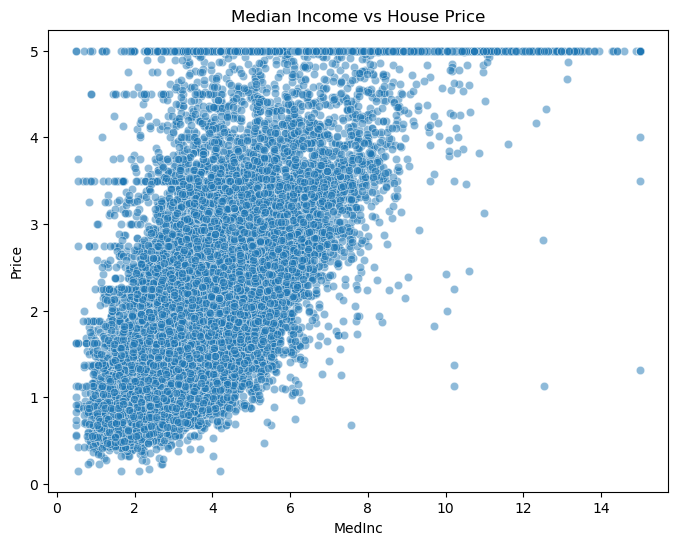

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="MedInc", y='Price', data=df, alpha =0.5)
plt.title('Median Income vs House Price')
plt.show()

In [14]:
corr_matrix=df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


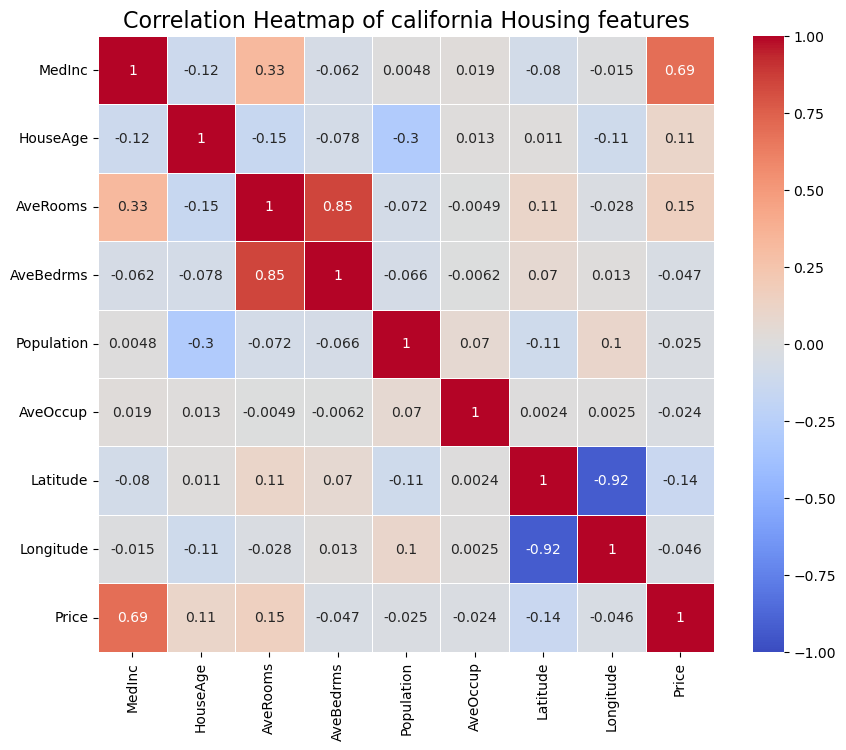

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,center=0,square=True,linewidths=0.5)
plt.title('Correlation Heatmap of california Housing features',fontsize=16)
plt.show()

In [16]:

x=df[['MedInc']]
y=df[['Price']]


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [18]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: [0.44459729]
Coefficients: [[0.41933849]]


In [20]:
y_pred = model.predict(x_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
 
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 0.7091157771765548
R-squared: 0.45885918903846656
Root Mean Squared Error: 0.8420901241414454


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_test,y_test,color='blue',label)

In [12]:
import numpy as np

def compute_line_equation(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    y2 = y - y_mean
    x2 = x - x_mean
    mul = x2 * y2
    mul_sum = np.sum(mul)
    x2_sqr = np.sum(x2 ** 2)
    m = mul_sum / x2_sqr
    c = y_mean - (m * x_mean)
    return m, c

def predict(x_values, m, c):
    return m * np.array(x_values) + c

def r2(y_p, y_true):
    y_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_mean) ** 2)
    ss_residual = np.sum((y_true - y_p) ** 2)
    return 1 - (ss_residual / ss_total)

x = df["MedInc"]
y = df["Price"]

m, c = compute_line_equation(x, y)

print(f"Equation of the line: y = {m} x + {c}")

x_new = 8.3252	
y_p = predict(x_new, m, c)

print(f"Predictions for MedInc = {x_new}: Price = {y_p}")

r_squared = r2(y_p, y)
print(f"R-squared: {r_squared}")


Equation of the line: y = 0.41793849201896244 x + 0.45085576703268027
Predictions for MedInc = 8.3252: Price = 3.9302773007889464
R-squared: -2.6029794932449124
